# Libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load Images

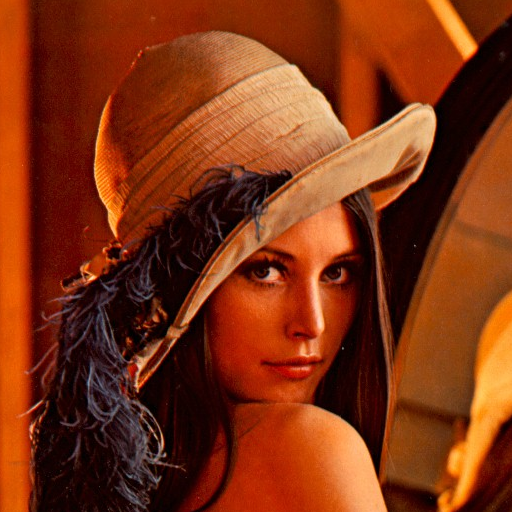

In [2]:
img1 = Image.open('lenna-RGB.tif')
display(img1)

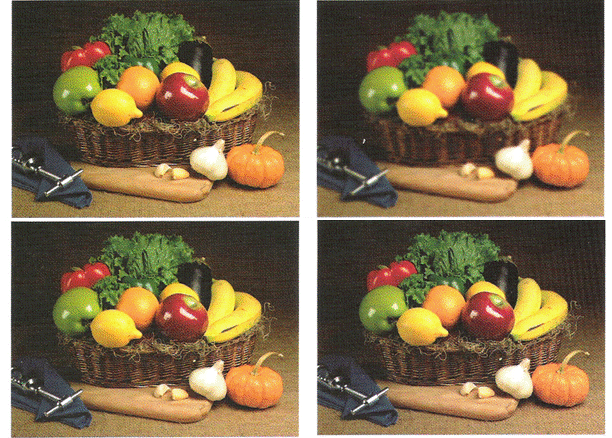

In [3]:
img2 = Image.open('Visual resolution.gif').convert('RGB')
display(img2)

# Useful Functions

In [7]:
def color_edge_detection(image, figsize):
    image_arr = np.array(image)

    # Sobel kernel
    sobel_kernel_x = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]])
    sobel_kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Split image into 3 channels: B, G, R
    b, g, r = image_arr[:, :, 0], image_arr[:, :, 1], image_arr[:, :, 2]

    def sobel(channel):
        grad_x = cv2.filter2D(channel, cv2.CV_64F, sobel_kernel_x)
        grad_y = cv2.filter2D(channel, cv2.CV_64F, sobel_kernel_y)
        return np.sqrt(grad_x**2 + grad_y**2)

    sobel_b = sobel(b)
    sobel_g = sobel(g)
    sobel_r = sobel(r)

    # Merge B, G, R after sobel
    sobel_img = np.stack([sobel_b, sobel_g, sobel_r], axis=2)

    # 將結果轉換為uint8
    sobel_img = (sobel_img / np.max(sobel_img)) * 255
    sobel_img = sobel_img.astype(np.uint8)
    
    plt.figure(figsize=figsize)
    
    # Sobel處理過的R component
    plt.subplot(2, 2, 1)
    plt.imshow(sobel_r, cmap='gray')
    plt.title('Red component')
    plt.axis('off')

    # Sobel處理過的G component
    plt.subplot(2, 2, 2)
    plt.imshow(sobel_g, cmap='gray')
    plt.title('Green component')
    plt.axis('off')

    # Sobel處理過的B component
    plt.subplot(2, 2, 3)
    plt.imshow(sobel_b, cmap='gray')
    plt.title('Blue component')
    plt.axis('off')

    # 三個sobel 處理過的component加起來
    plt.subplot(2, 2, 4)
    plt.imshow(sobel_img)
    plt.title('R+G+B')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

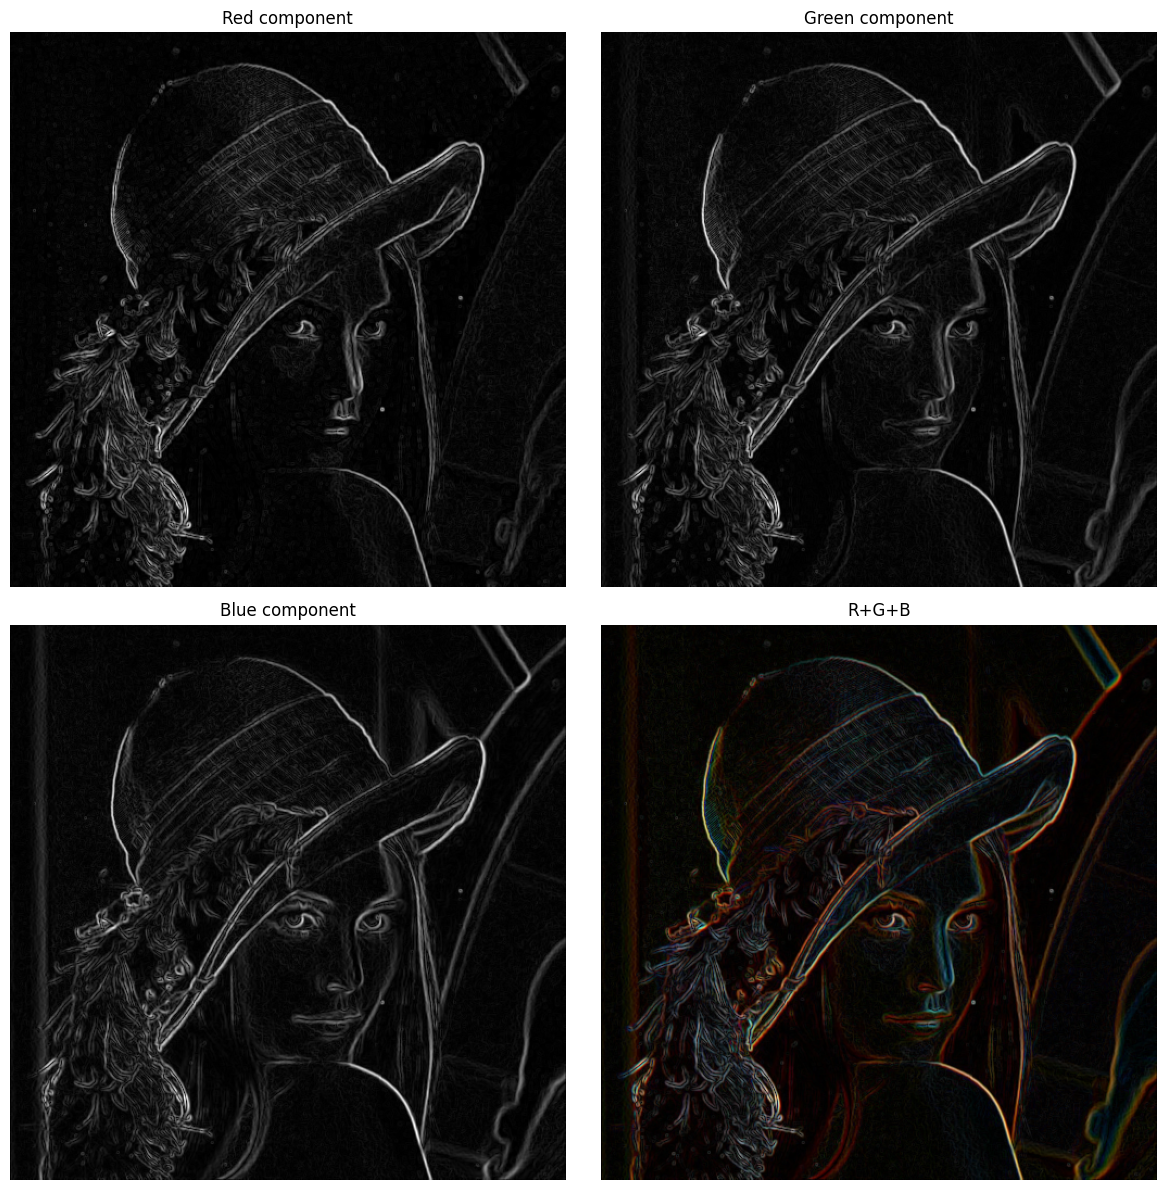

In [8]:
color_edge_detection(img1, figsize=(12, 12))

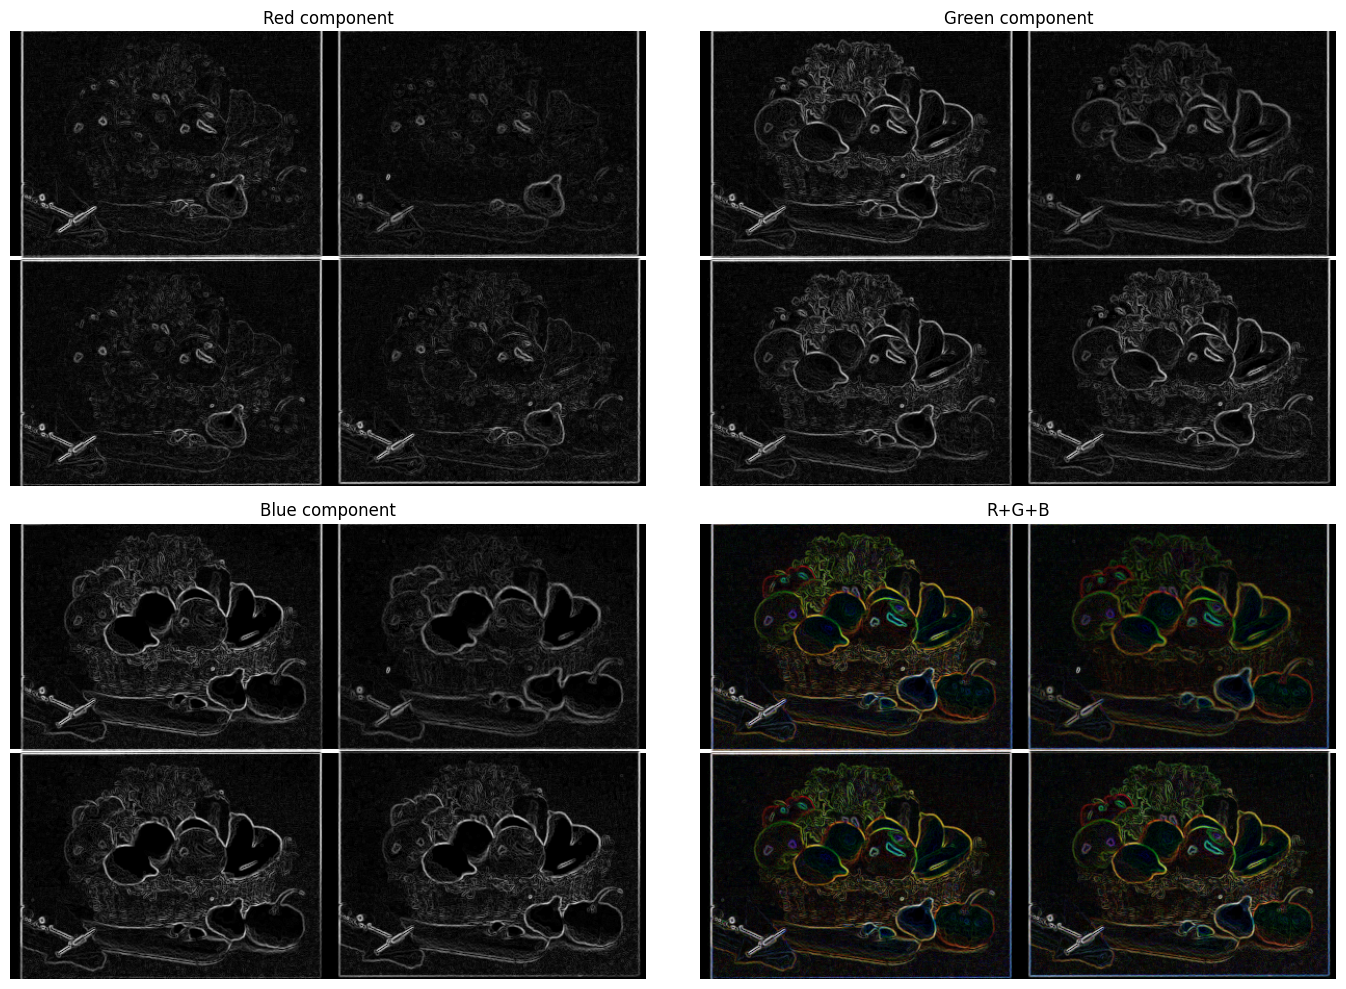

In [9]:
color_edge_detection(img2, figsize=(14, 10))